In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import nibabel as nib
import psutil
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
from scipy import ndimage

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [3]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/luke.nii'
anatomy_mean = np.asarray(nib.load(file).get_data(), dtype='float32')/1

In [3]:
# flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094', 'fly_096',
#          'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_102', 'fly_105', 'fly_106',
#          'fly_110', 'fly_111']

In [22]:
flies = ['fly_084', 'fly_086', 'fly_087', 'fly_088', 'fly_089', 'fly_091', 'fly_092', 'fly_093', 'fly_094', 'fly_095', 'fly_096',
         'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_102', 'fly_103', 'fly_104', 'fly_105', 'fly_106', 'fly_107', 
         'fly_108', 'fly_109', 'fly_110', 'fly_111']

In [4]:
flies = ['fly_087', 'fly_089', 'fly_094', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']

In [14]:
# flies = ['fly_086', 'fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094', 'fly_095', 'fly_096',
#          'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_102', 'fly_103', 'fly_104', 'fly_105', 'fly_106', 'fly_107', 
#          'fly_109', 'fly_110', 'fly_111']

In [ ]:
# 'fly_084','fly_088','fly_091','fly_108'

In [5]:
anats = {}
for fly in flies:
    print(fly)
    to_load = os.path.join(dataset_path, fly, 'warp', 'anat-to-meanbrain.nii')
    anats[fly] = np.array(nib.load(to_load).get_data(), copy=True)

fly_087
fly_089
fly_094
fly_097
fly_098
fly_099
fly_100
fly_101
fly_105


In [6]:
flies.insert(0,'meanbrain')
anats['meanbrain'] = anatomy_mean

In [7]:
len(anats)

10

In [8]:
from matplotlib_scalebar.scalebar import ScaleBar

In [9]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [55]:
# single pixel is 0.65um
# so 50um is 
50/.65

76.92307692307692

In [12]:
FB = [405:575,110:260,102]
PB = [400:575,200:300,60]
Optic_lobe = [700:925,225:425,110]
VLP = [225:375,150:300,120]
MB = [325:500,60:180,150]

SyntaxError: invalid syntax (<ipython-input-12-07fb49940170>, line 1)

In [56]:
FB = [slice(405,575),slice(110,260),102]
PB = [slice(400,575),slice(200,300),60]
Optic_lobe = [slice(700,925),slice(225,425),110]
VLP = [slice(225,400),slice(150,300),120]
#VLP = [slice(225,375),slice(150,300),120]
MB = [slice(325,500),slice(60,180),150]
regions = {'FB':FB, 'PB':PB, 'Optic_lobe':Optic_lobe, 'VLP':VLP, 'MB':MB}

In [50]:
375-225, 300-150

(150, 150)

In [51]:
575-400, 300-200

(175, 100)

150

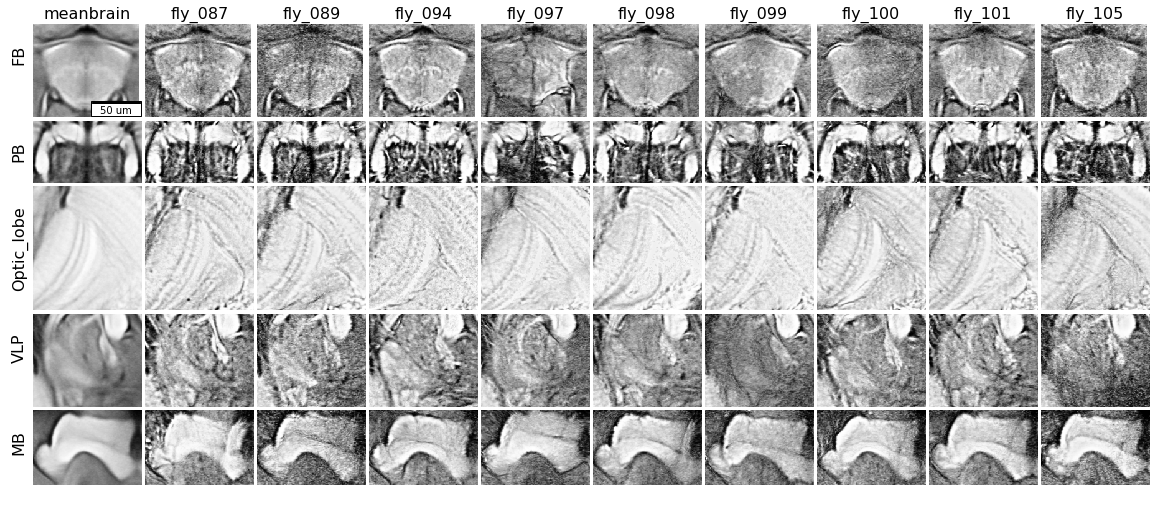

In [59]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 10), axes_pad=.05)

for j,region in enumerate(regions):
    for i,fly in enumerate(flies):
        grid[j*10+i].imshow(anats[fly][regions[region]].T,cmap='gray')
        #grid[i].axis('off')
        #grid[i].text(x=4,y=17,s='{}'.format(fly),fontsize=12,backgroundcolor='white')
        if i == 0 and j == 0:
    #         scalebar = ScaleBar(6.5*10**-7)
    #         grid[i].add_artist(scalebar)
            scalebar = AnchoredSizeBar(grid[j*10+i].transData,
                               size=77, label='50 um', loc='lower right', 
                               pad=0.1,
                               color='black',
                               frameon=True,
                               size_vertical=2)

            grid[j*10+i].add_artist(scalebar)
        if j == 0:
            grid[j*10+i].set_title(fly,fontsize=16)
        if i == 0:
            grid[j*10+i].text(s=region,x=-35,y=50,rotation=90,fontsize=16)

    #plt.suptitle(x=.5, y=.92, t='Optic Lobe', fontsize=20)

for i in range(60):
    grid[i].axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 5), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(anats[fly][325:500,60:180,150].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=17,s='{}'.format(fly),fontsize=12,backgroundcolor='white')
    if i == 0:
#         scalebar = ScaleBar(6.5*10**-7)
#         grid[i].add_artist(scalebar)
        scalebar = AnchoredSizeBar(grid[i].transData,
                           size=77, label='50 um', loc='lower right', 
                           pad=0.1,
                           color='black',
                           frameon=True,
                           size_vertical=2)

        grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

for i in range(30):
    grid[i].axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [35]:
keys = [x for x in brains.keys() if '_m-' not in x]

In [131]:
#remove fly 102 - looks a little wonky and want 15 + 1mean to fit nicely in figs
keys.remove('fly_102-to-seed_syn_1_mean.nii.nii')

In [134]:
keys.sort()

In [138]:
# add meanbrain
brains['meanbrain'] = meanbrain

In [139]:
keys.insert(0,'meanbrain')

In [140]:
keys

['meanbrain',
 'fly_087-to-seed_syn_1_mean.nii.nii',
 'fly_089-to-seed_syn_1_mean.nii.nii',
 'fly_092-to-seed_syn_1_mean.nii.nii',
 'fly_093-to-seed_syn_1_mean.nii.nii',
 'fly_094-to-seed_syn_1_mean.nii.nii',
 'fly_096-to-seed_syn_1_mean.nii.nii',
 'fly_097-to-seed_syn_1_mean.nii.nii',
 'fly_098-to-seed_syn_1_mean.nii.nii',
 'fly_099-to-seed_syn_1_mean.nii.nii',
 'fly_100-to-seed_syn_1_mean.nii.nii',
 'fly_101-to-seed_syn_1_mean.nii.nii',
 'fly_105-to-seed_syn_1_mean.nii.nii',
 'fly_106-to-seed_syn_1_mean.nii.nii',
 'fly_110-to-seed_syn_1_mean.nii.nii',
 'fly_111-to-seed_syn_1_mean.nii.nii']

In [ ]:
FB = [405:575,110:260,102]
PB = [400:575,200:300,60]
Optic_lobe = [700:925,225:425,110]
VLP = [225:375,150:300,120]
MB = [325:500,60:180,150]

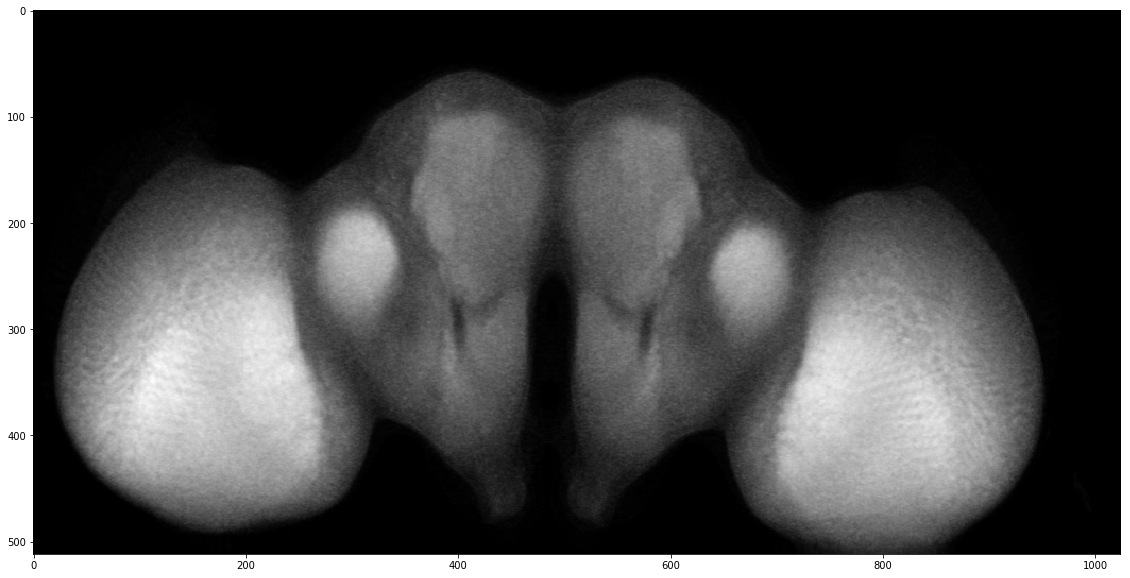

In [285]:
fig = plt.figure(figsize=(20,10))
plt.imshow(meanbrain[...,200].T,cmap='gray')
scalebar = ScaleBar(6.5*10**-7) # 1 pixel = 0.2 meter
#plt.gca().add_artist(scalebar)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

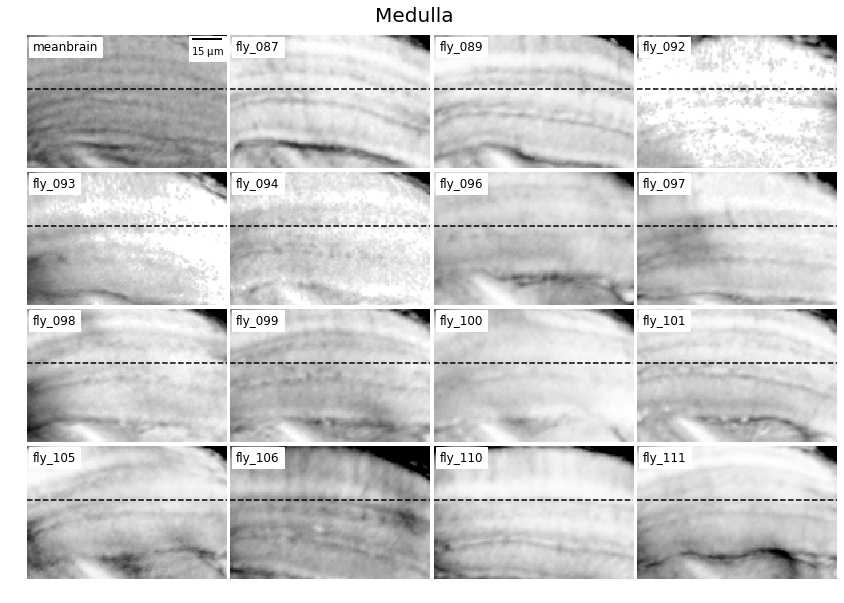

In [260]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,key in enumerate(keys):
    to_plot = ndimage.rotate(brains[key][...,110], -50)[230:330,775:925]
    grid[i].imshow(to_plot,cmap='gray',vmin=.7,vmax=1)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s='{}'.format(key.split('-')[0]),fontsize=12,backgroundcolor='white')
    if i == 0:
        scalebar = ScaleBar(6.5*10**-7, location='upper right')
        grid[i].add_artist(scalebar)
    grid[i].axhline(40,linestyle='--',color='k')
plt.suptitle(x=.5, y=.92, t='Medulla', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

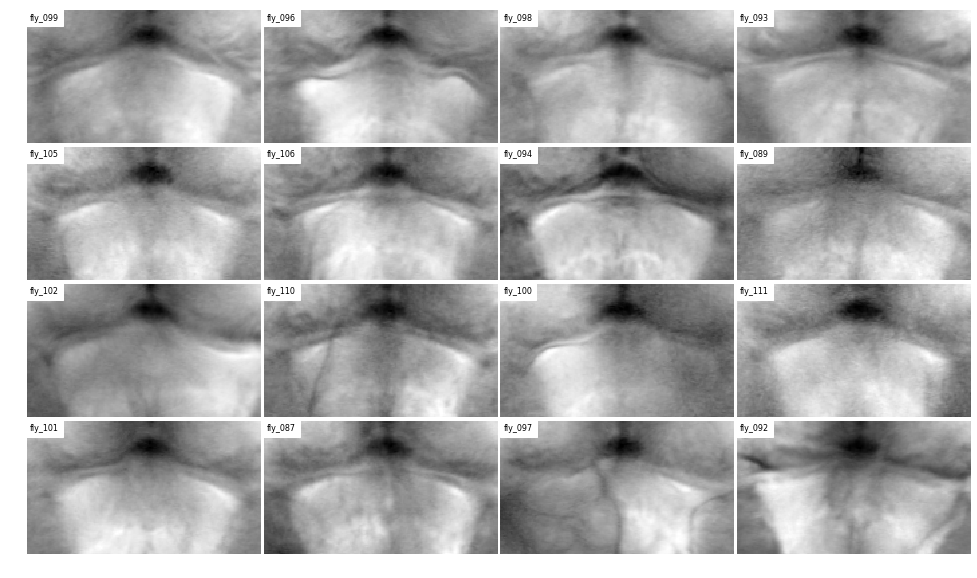

In [110]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)

for i,key in enumerate(keys):
    grid[i].imshow(brains[key][400:575,100:200,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=2,y=7,s='{}'.format(key.split('-')[0]),fontsize=8,backgroundcolor='white')